## Analyzing patients' data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
loadPath = "../data/"
savePath = "../results/"

### Frequency of visits per patient

In [53]:
df = pd.read_csv(loadPath + 'MRIT1_longitudinal_ALZD.csv')

# Count the occurrences of each patient (NACCID) in the dataset
naccid_counts = df['NACCID'].value_counts()

# Count how many patients have 2 scans, 3 scans, and so on
scan_frequency = naccid_counts.value_counts().sort_index()

# Printing the results
print(scan_frequency)
print('Total number of patients with more than one MRIT1 scan =', np.sum(scan_frequency.values))

count
2     530
3     257
4      88
5      35
6      23
7      22
8      17
9       8
10     17
11      3
12      4
13      1
14      2
Name: count, dtype: int64
Total number of patients with more than one MRIT1 scan = 1007


### Visualizing data

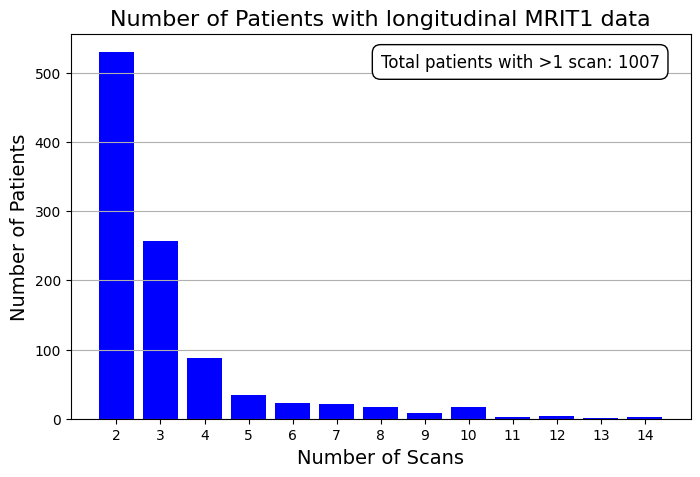

In [54]:
plt.figure(figsize=(8, 5))
plt.bar(scan_frequency.index, scan_frequency.values, color='blue')
plt.title('Number of Patients with longitudinal MRIT1 data', fontsize=16)
plt.xlabel('Number of Scans', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(scan_frequency.index)                                          
plt.grid(axis='y')

textstr = f"Total patients with >1 scan: {np.sum(scan_frequency.values)}"

plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.savefig(savePath + 'MRIT1_patients_number_histogram_ALZD.png')
plt.show()

## Analyzing data by cognitive status
I have NACCIDs stored by the patients' cognitive status <br>
(1=normal cognition, 2=impaired-not MCI, 3=mild cognitive impairment, 4=demented)

Loading the .txt file. Each row represents one possible cognition status (constant or change).

In [55]:
# Open the .txt file and read lines into arrays
with open(loadPath + 'naccids_by_uds_categories_ALZD.txt', 'r') as f:
    lines = f.readlines()

In [56]:
constant_1_array = [x for x in lines[0].strip().split(',') if x]
constant_2_array = [x for x in lines[1].strip().split(',') if x]
constant_3_array = [x for x in lines[2].strip().split(',') if x]
constant_4_array = [x for x in lines[3].strip().split(',') if x]
change_1_2_array = [x for x in lines[4].strip().split(',') if x]
change_1_3_array = [x for x in lines[5].strip().split(',') if x]
change_1_4_array = [x for x in lines[6].strip().split(',') if x]
change_1_2_3_array = [x for x in lines[7].strip().split(',') if x]
change_1_2_4_array = [x for x in lines[8].strip().split(',') if x]
change_1_3_4_array = [x for x in lines[9].strip().split(',') if x]
change_1_2_3_4_array = [x for x in lines[10].strip().split(',') if x]
change_2_3_array = [x for x in lines[11].strip().split(',') if x]
change_2_4_array = [x for x in lines[12].strip().split(',') if x]
change_2_3_4_array = [x for x in lines[13].strip().split(',') if x]
change_3_4_array = [x for x in lines[14].strip().split(',') if x]

### Sanity check
Checking the total count of all patients to see if I covered all of them.

In [57]:
total_count = (
    len(constant_1_array) + len(constant_2_array) + len(constant_3_array) + len(constant_4_array) +
    len(change_1_2_array) + len(change_1_3_array) + len(change_1_4_array) +
    len(change_1_2_3_array) + len(change_1_2_4_array) + len(change_1_3_4_array) +
    len(change_1_2_3_4_array) + len(change_2_3_array) + len(change_2_4_array) +
    len(change_2_3_4_array) + len(change_3_4_array)
)

print(f"Total number of NACCIDs across all categories: {total_count}")


Total number of NACCIDs across all categories: 1007


By only taking patients with NACCALZD = 0 or 1, I lost all the patients who had constant NACCUDSD = 1 (normal cognition)

In [58]:
print(len(constant_1_array))

0


### Visualizing by UDSD

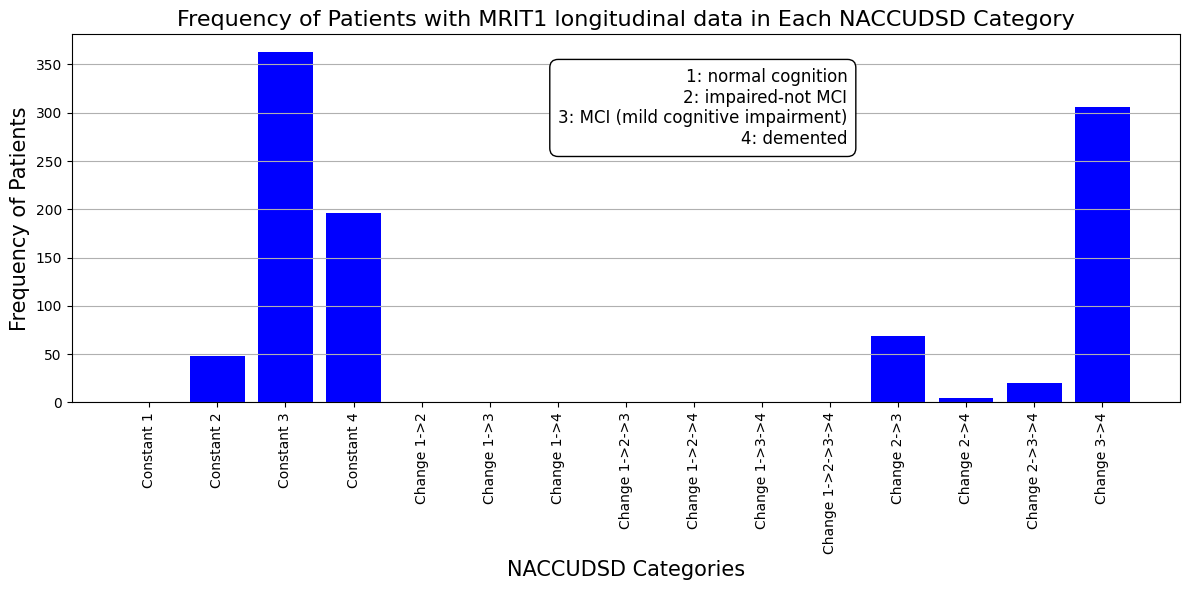

In [59]:
category_lengths = {
    "Constant 1": len(constant_1_array),
    "Constant 2": len(constant_2_array),
    "Constant 3": len(constant_3_array),
    "Constant 4": len(constant_4_array),
    "Change 1->2": len(change_1_2_array),
    "Change 1->3": len(change_1_3_array),
    "Change 1->4": len(change_1_4_array),
    "Change 1->2->3": len(change_1_2_3_array),
    "Change 1->2->4": len(change_1_2_4_array),
    "Change 1->3->4": len(change_1_3_4_array),
    "Change 1->2->3->4": len(change_1_2_3_4_array),
    "Change 2->3": len(change_2_3_array),
    "Change 2->4": len(change_2_4_array),
    "Change 2->3->4": len(change_2_3_4_array),
    "Change 3->4": len(change_3_4_array)
}

# Prepare data for histogram
labels = list(category_lengths.keys())
values = list(category_lengths.values())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('NACCUDSD Categories', fontsize=15)
plt.ylabel('Frequency of Patients', fontsize=15)
plt.title('Frequency of Patients with MRIT1 longitudinal data in Each NACCUDSD Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

textstr = (
    "1: normal cognition\n"
    "2: impaired-not MCI\n"
    "3: MCI (mild cognitive impairment)\n"
    "4: demented"
)

plt.gca().text(0.7, 0.8, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='right',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.savefig(savePath + 'MRIT1_patients_number_by_udsd_histogram_ALZD.png')
plt.show()